![Análise da rotatividade dos clientes](images/img1.jpg)

# Análise da rotatividade dos clientes

O conjunto de dados é dividio em dados de treino e teste. Ambos os datasets têm 20 colunas, com os seguintes significados:

* state: sigla do estado
* account_length: número de dias que a conta está ativa
* area_code: código de área do número de telefone do cliente
* international_plan: se o cliente tem um plano internacional
* voice_mail_plan: se o cliente tem correio de voz
* number_vmail_messages: o número de correios de voz por mês
* total_day_minutes: total de minutos de chamada durante o dia
* total_day_calls: número de chamadas durante o dia 
* total_day_charge: conta de chamadas durante o dia
* total_eve_minutes: total de minutos de chamada durante a tarde
* total_eve_calls: número de chamadas durante a tarde
* total_eve_charge: conta de chamadas durante a tarde
* total_night_minutes: total de minutos de chamada durante a noite
* total_night_calls: número de chamadas durante a noite
* total_night_charge: conta de chamadas durante a noite
* total_intl_minutes: minutos em chamadas internacionais
* total_intl_calls: número de chamadas internacionais
* total_intl_charge: conta de chamadas internacionais
* number_customer_service_calls: número de chamadas para o serviço de atendimento ao consumidor
* churn: se o consumidor deixou o serviço

# 1 - Importando bibliotecas

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# 2 - Carregando os dados

In [47]:
train_df = pd.read_csv("./data/projeto4_telecom_treino.csv", index_col=0)
test_df = pd.read_csv("./data/projeto4_telecom_teste.csv", index_col=0)

In [48]:
train_df.head()

state  account_length      area_code international_plan voice_mail_plan  \
1    KS             128  area_code_415                 no             yes   
2    OH             107  area_code_415                 no             yes   
3    NJ             137  area_code_415                 no              no   
4    OH              84  area_code_408                yes              no   
5    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
1                     25              265.1              110   
2                     26              161.6              123   
3                      0              243.4              114   
4                      0              299.4               71   
5                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1             45.07              197.4               99             16.78   
2             27.47              195.5              103             16.62   
3             41.38              121.2              110             10.30   
4             50.90               61.9               88              5.26   
5             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
1                244.7                 91               11.01   
2                254.4                103               11.45   
3                162.6                104                7.32   
4                196.9                 89                8.86   
5                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
1                10.0                 3               2.70   
2                13.7                 3               3.70   
3                12.2                 5               3.29   
4                 6.6                 7               1.78   
5                10.1                 3               2.73   

   number_customer_service_calls churn  
1                              1    no  
2                              1    no  
3                              0    no  
4                              2    no  
5                              3    no

# 3 - Análises Iniciais

In [49]:
train_df.duplicated().sum()

0

* O conjunto de treino não apresenta dados duplicados.

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

* Aparentemente o conjunto de dados de treino não apresenta valores ausentes ( Todas as colunas tem o mesmo número de entradas não-nulas).
* Temos 15 colunas numéricas - 8 `float64` e 7 `int64` - que estão com os tipos corretos. Falta analisar o tipo das 5 colunas restantes que estão como `object`.

## 3.1 - Análise das colunas categóricas

In [51]:
features_numericas = list(train_df.select_dtypes('number').columns)
features_categoricas = ['state', 'area_code', 'internacional_plan', 'voice_mail_plan']

print(f'Lista de features categóricas: {features_categoricas}\n')
print(f'Lista de features numéricas: {features_numericas}')

Lista de features categóricas: ['state', 'area_code', 'internacional_plan', 'voice_mail_plan']

Lista de features numéricas: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


### Churn

In [52]:
train_df.churn.value_counts()

no     2850
yes     483
Name: churn, dtype: int64

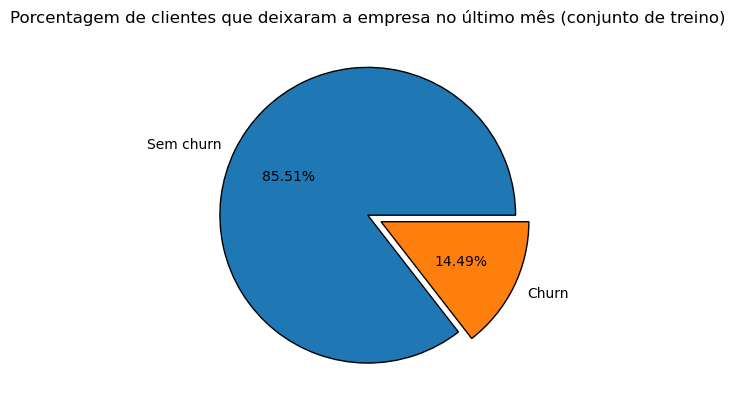

In [53]:
churn_count = list(train_df.churn.value_counts())
churn_count = [i*100/sum(churn_count) for i in churn_count]

plt.pie(
    churn_count,
    autopct='%1.2f%%',
    explode=(0,0.1),
    labels=['Sem churn', 'Churn'],
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 1,
        'antialiased': True
    })

plt.title("Porcentagem de clientes que deixaram a empresa no último mês (conjunto de treino)")
plt.show()

* O conjunto de treino está desbalanceado, com uma proporção quase de 6 clientes que não deixaram a empresa para 1 que deixou. Assim, é importante verificar se o conjunto de testes apresenta uma proporção semelhante

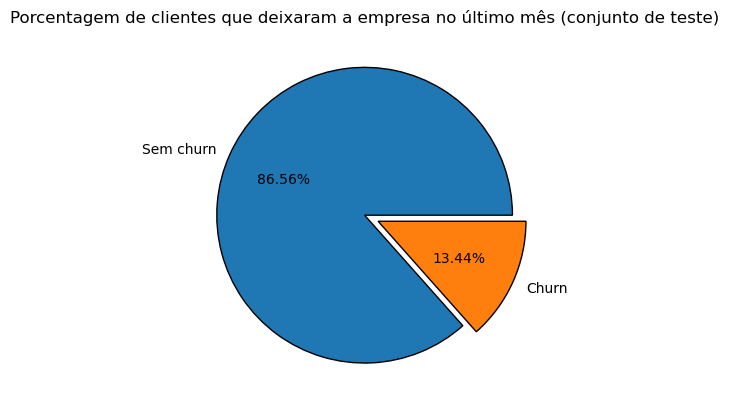

In [54]:
churn_count_test = list(test_df.churn.value_counts())
churn_count_test = [i*100/sum(churn_count_test) for i in churn_count_test]

plt.pie(
    churn_count_test,
    autopct='%1.2f%%',
    explode=(0,0.1),
    labels=['Sem churn', 'Churn'],
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 1,
        'antialiased': True
    })

plt.title("Porcentagem de clientes que deixaram a empresa no último mês (conjunto de teste)")
plt.show()

Verificamos que no conjunto de teste a proporção entre churn e não churn é aproximadamente a mesma do conjunto de treino. Como os conjuntos de dados são desbalanceados, é preciso ter atenção ao tipo de métrica utilizada para os algoritmos de Machine Learning. Um modelo que classificasse todas as entradas como não havendo churn teria uma acurácia em torno de 86%, no entanto seria inútil para fins práticos.

Em termos de negócio, devemos avaliar qual o principal objetivo dos modelos que serão construídos. Nesse caso, devemos focar em prever quais clienter **irão deixar a empresa**, a fim de agir para impedir isso. Dessa forma, o ideal é minimizar o número de erros do tipo 2 (quando o modelo diz que não há churn, mas na verdade há).

### Análise dos estados

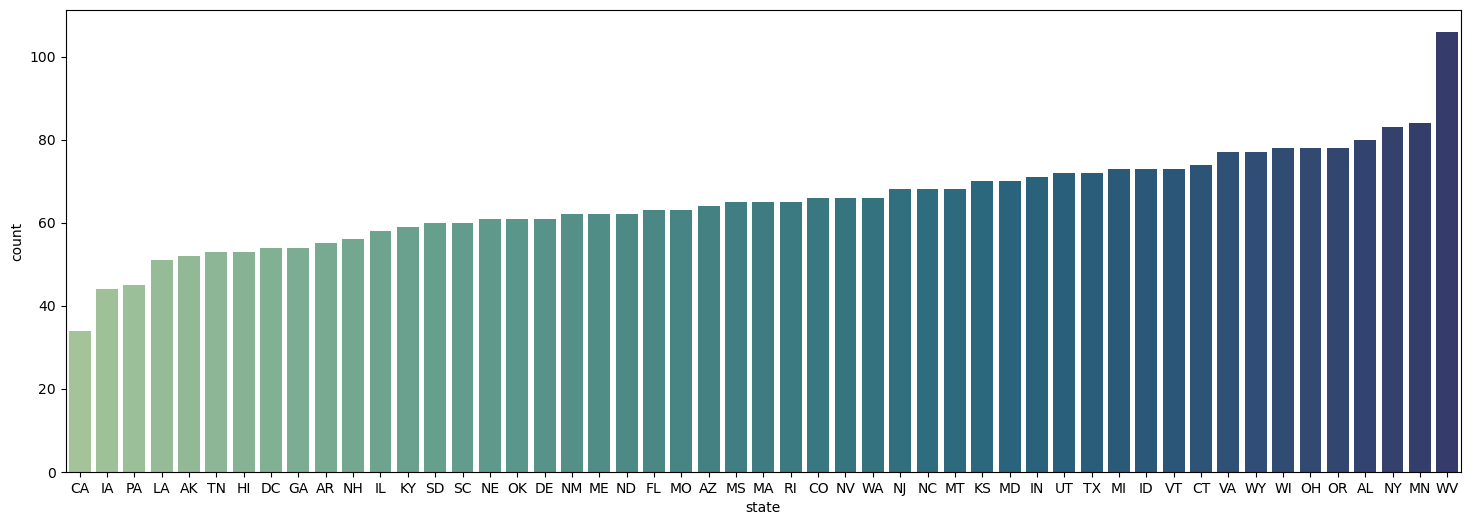

In [55]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'state', data = train_df, order = train_df.state.value_counts(ascending=True).index, palette='crest')
plt.show()

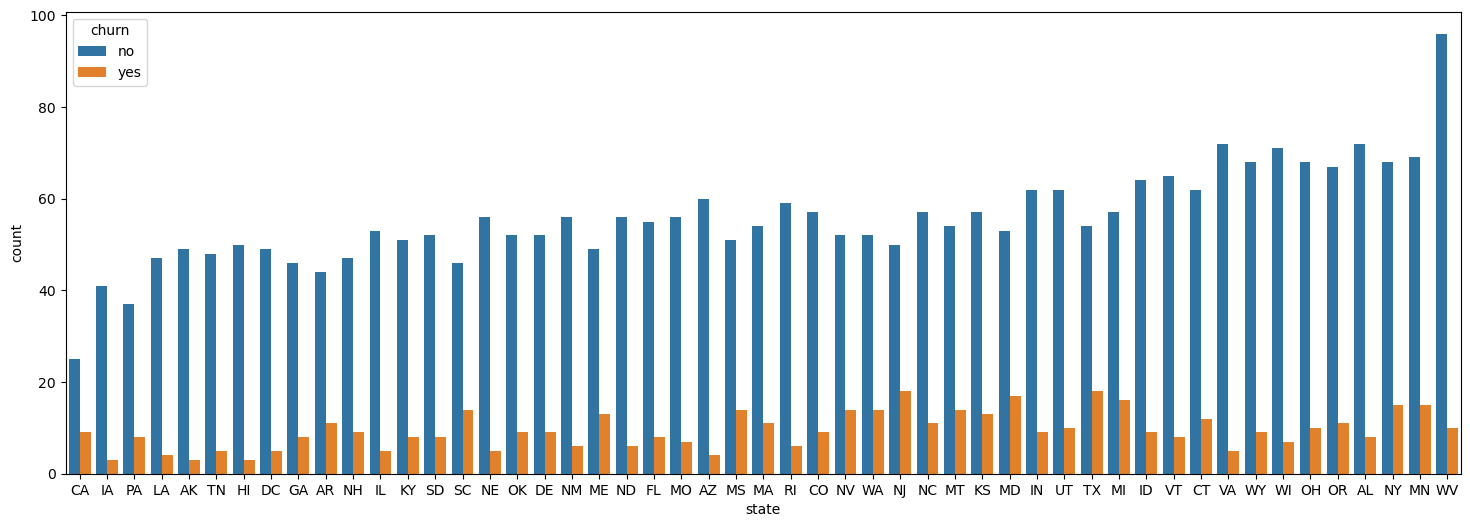

In [56]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'state', data = train_df, order = train_df.state.value_counts(ascending=True).index, hue='churn')
plt.show()

### Código de área

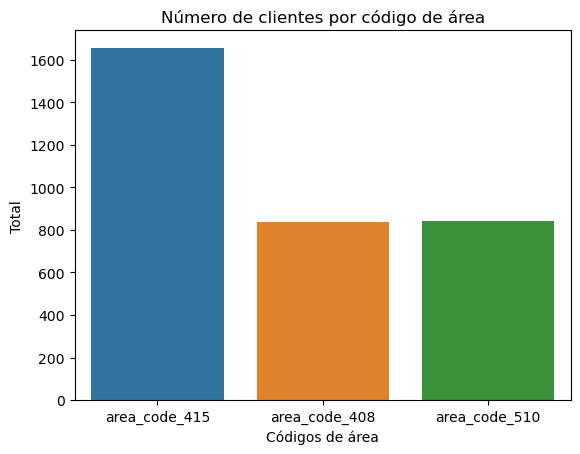

In [57]:
sns.countplot(x = 'area_code', data=train_df)
plt.xlabel("Códigos de área")
plt.ylabel("Total")
plt.title("Número de clientes por código de área")
plt.show()

In [58]:
train_df.groupby("area_code").churn.value_counts(normalize=True).reset_index(name="count")

area_code churn     count
0  area_code_408    no  0.854415
1  area_code_408   yes  0.145585
2  area_code_415    no  0.857402
3  area_code_415   yes  0.142598
4  area_code_510    no  0.851190
5  area_code_510   yes  0.148810

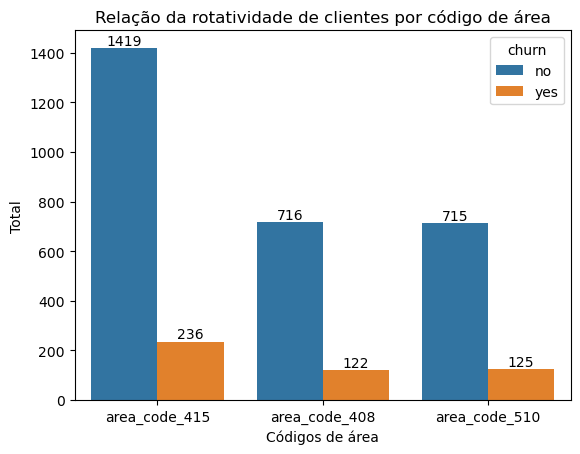

In [59]:
ax = sns.countplot(x = 'area_code', data=train_df, hue='churn')
plt.xlabel("Códigos de área")
plt.ylabel("Total")
plt.title("Relação da rotatividade de clientes por código de área")


for container in ax.containers:
    ax.bar_label(container)

plt.show()

A primeira vista, não há uma relação clara entre o código de área e a proporção entre churn ou não.

### Plano Internacional

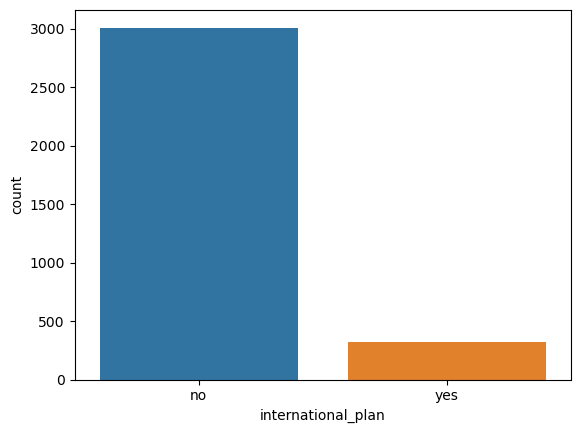

In [60]:
sns.countplot(x = "international_plan", data=train_df)
plt.show()

## 3.2 - Análise das Colunas Numéricas

In [61]:
print(f"Lembrando: nosso conjunto de dados possui {len(features_numericas)} atributos numéricos")

Lembrando: nosso conjunto de dados possui 15 atributos numéricos


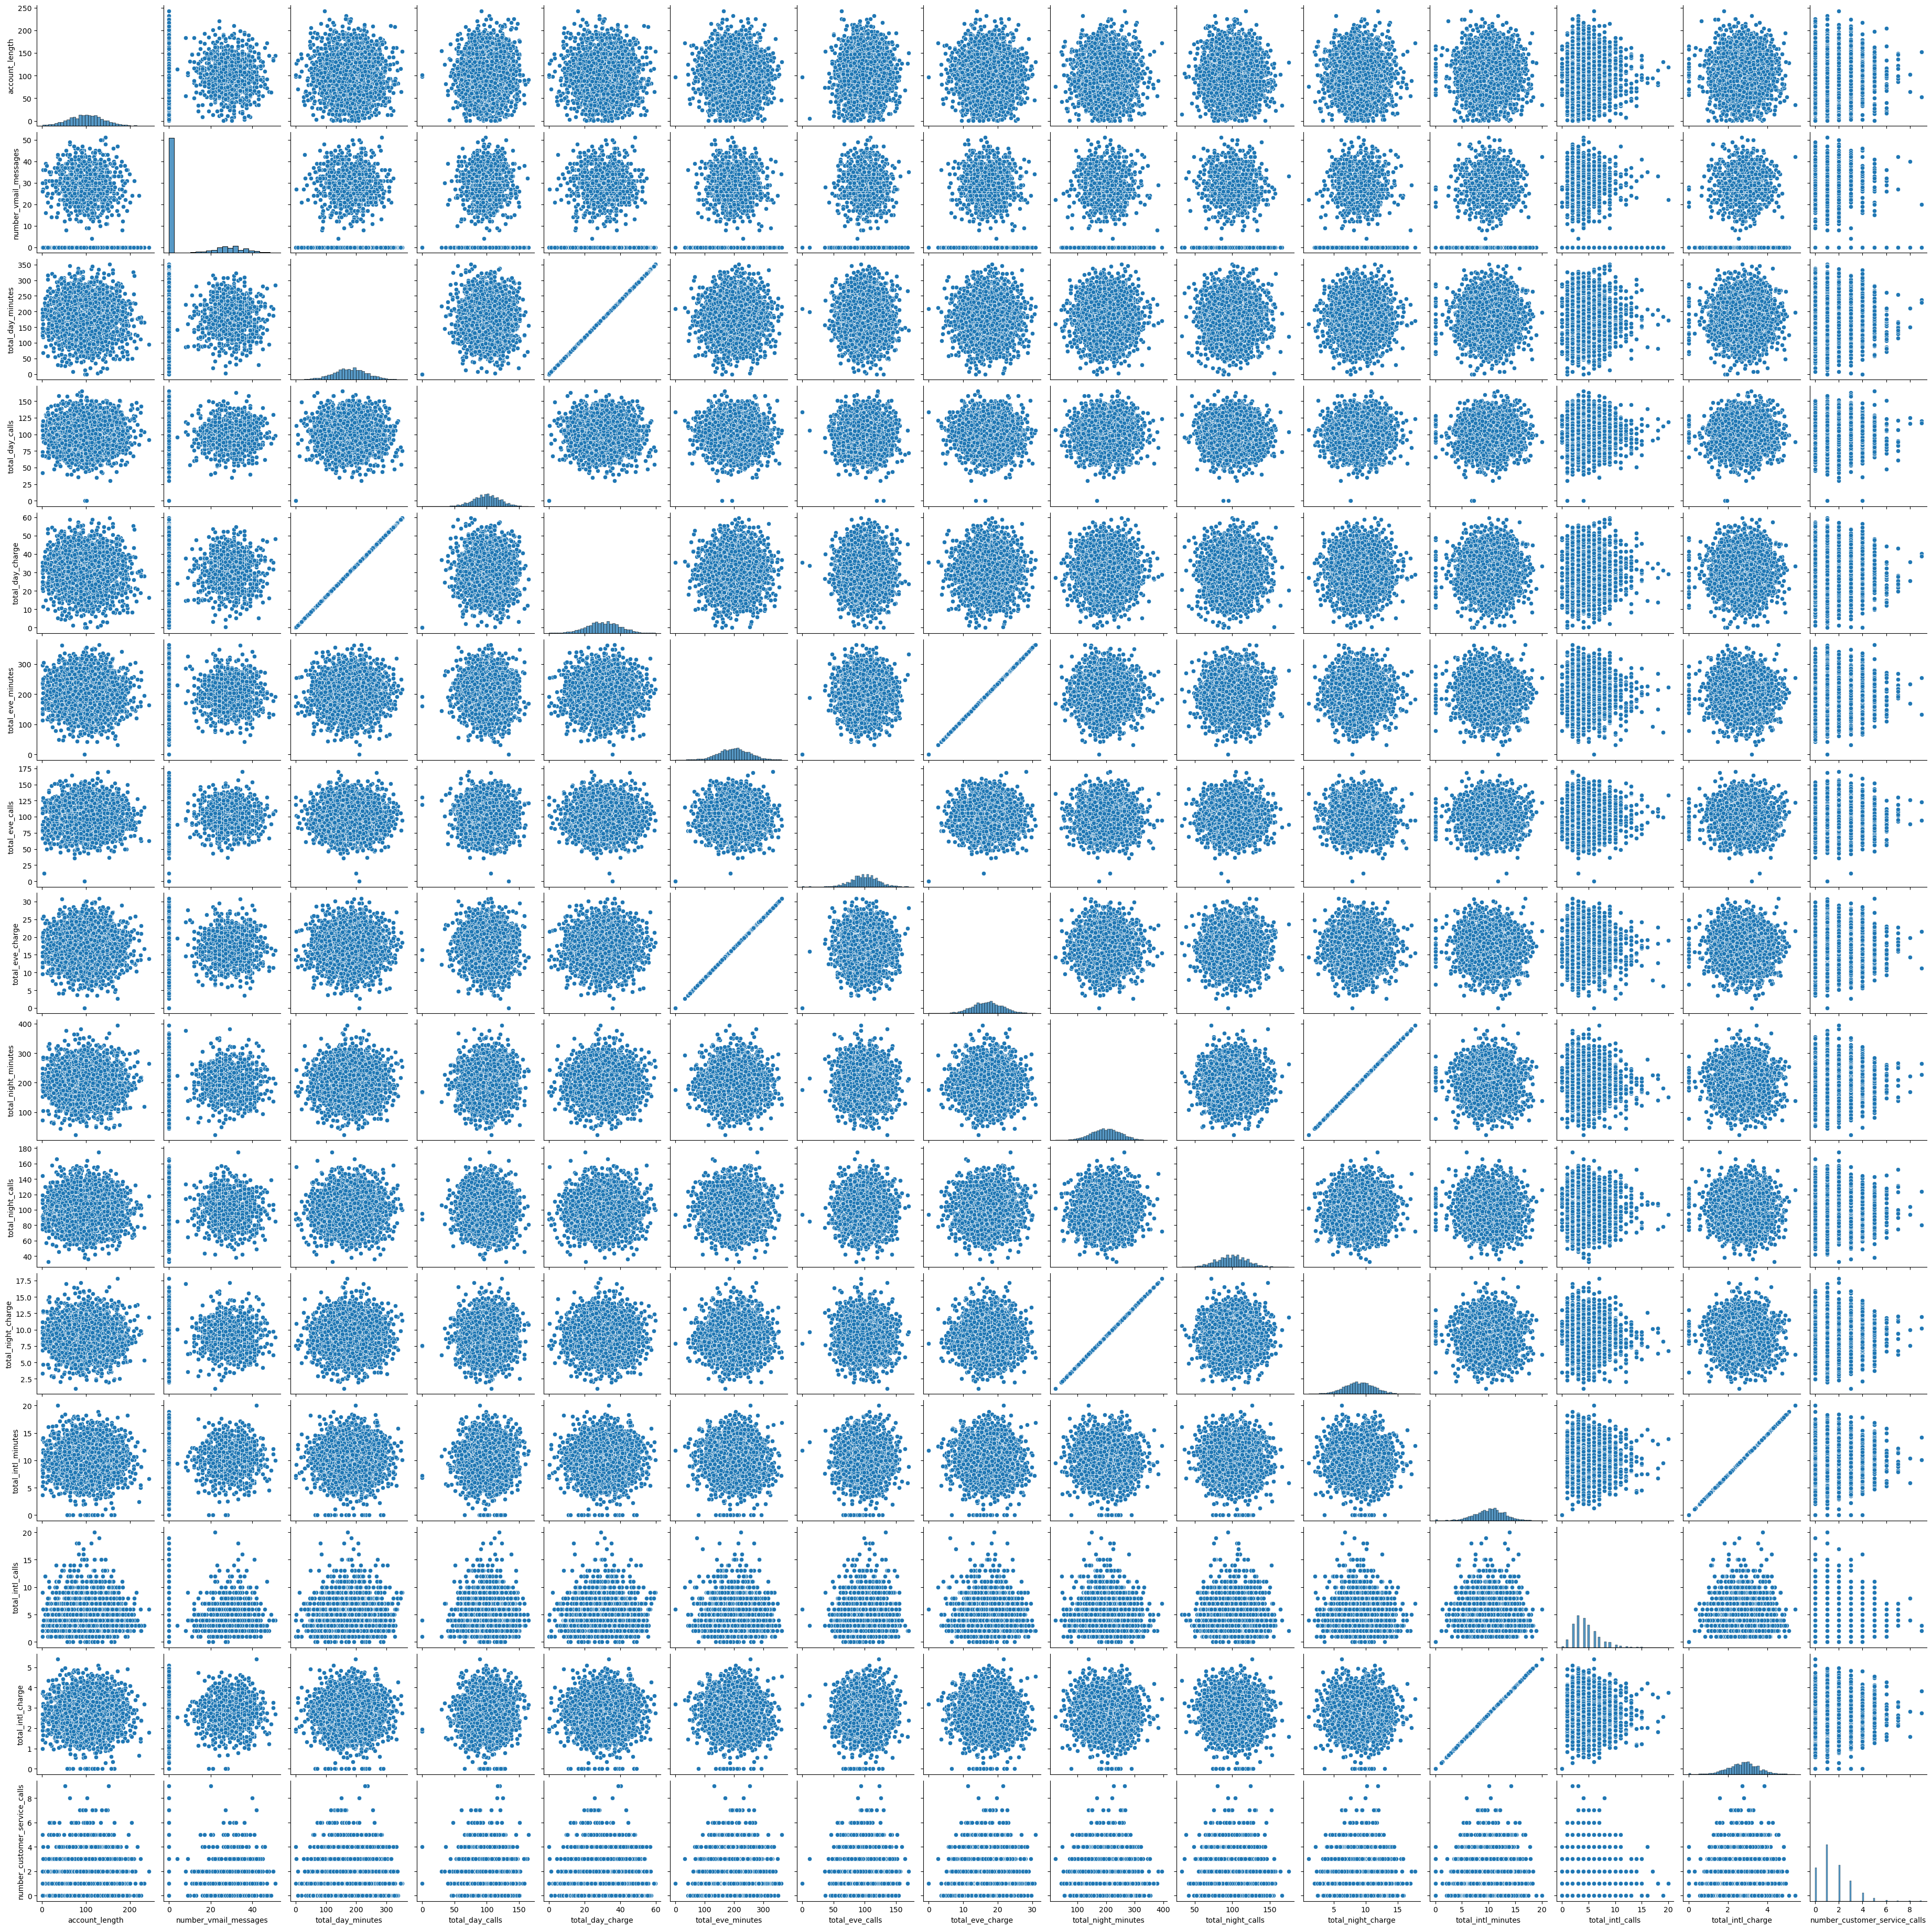

In [62]:
sns.pairplot(train_df[features_numericas]);

Podemos ver que a maioria dos dados não apresenta uma correlação aparente, no entanto algumas colunas parecem ter uma relação linear perfeita. Vamos investigar analisando os valores de correlação.

In [63]:
corr = train_df[features_numericas].corr()
display(corr)

account_length  number_vmail_messages  \
account_length                       1.000000              -0.004628   
number_vmail_messages               -0.004628               1.000000   
total_day_minutes                    0.006216               0.000778   
total_day_calls                      0.038470              -0.009548   
total_day_charge                     0.006214               0.000776   
total_eve_minutes                   -0.006757               0.017562   
total_eve_calls                      0.019260              -0.005864   
total_eve_charge                    -0.006745               0.017578   
total_night_minutes                 -0.008955               0.007681   
total_night_calls                   -0.013176               0.007123   
total_night_charge                  -0.008960               0.007663   
total_intl_minutes                   0.009514               0.002856   
total_intl_calls                     0.020661               0.013957   
total_intl_charge                    0.009546               0.002884   
number_customer_service_calls       -0.003796              -0.013263   

                               total_day_minutes  total_day_calls  \
account_length                          0.006216         0.038470   
number_vmail_messages                   0.000778        -0.009548   
total_day_minutes                       1.000000         0.006750   
total_day_calls                         0.006750         1.000000   
total_day_charge                        1.000000         0.006753   
total_eve_minutes                       0.007043        -0.021451   
total_eve_calls                         0.015769         0.006462   
total_eve_charge                        0.007029        -0.021449   
total_night_minutes                     0.004323         0.022938   
total_night_calls                       0.022972        -0.019557   
total_night_charge                      0.004300         0.022927   
total_intl_minutes                     -0.010155         0.021565   
total_intl_calls                        0.008033         0.004574   
total_intl_charge                      -0.010092         0.021666   
number_customer_service_calls          -0.013423        -0.018942   

                               total_day_charge  total_eve_minutes  \
account_length                         0.006214          -0.006757   
number_vmail_messages                  0.000776           0.017562   
total_day_minutes                      1.000000           0.007043   
total_day_calls                        0.006753          -0.021451   
total_day_charge                       1.000000           0.007050   
total_eve_minutes                      0.007050           1.000000   
total_eve_calls                        0.015769          -0.011430   
total_eve_charge                       0.007036           1.000000   
total_night_minutes                    0.004324          -0.012584   
total_night_calls                      0.022972           0.007586   
total_night_charge                     0.004301          -0.012593   
total_intl_minutes                    -0.010157          -0.011035   
total_intl_calls                       0.008032           0.002541   
total_intl_charge                     -0.010094          -0.011067   
number_customer_service_calls         -0.013427          -0.012985   

                               total_eve_calls  total_eve_charge  \
account_length                        0.019260         -0.006745   
number_vmail_messages                -0.005864          0.017578   
total_day_minutes                     0.015769          0.007029   
total_day_calls                       0.006462         -0.021449   
total_day_charge                      0.015769          0.007036   
total_eve_minutes                    -0.011430          1.000000   
total_eve_calls                       1.000000         -0.011423   
total_eve_charge                     -0.011423          1.000000   
total_night_minutes                  -0.

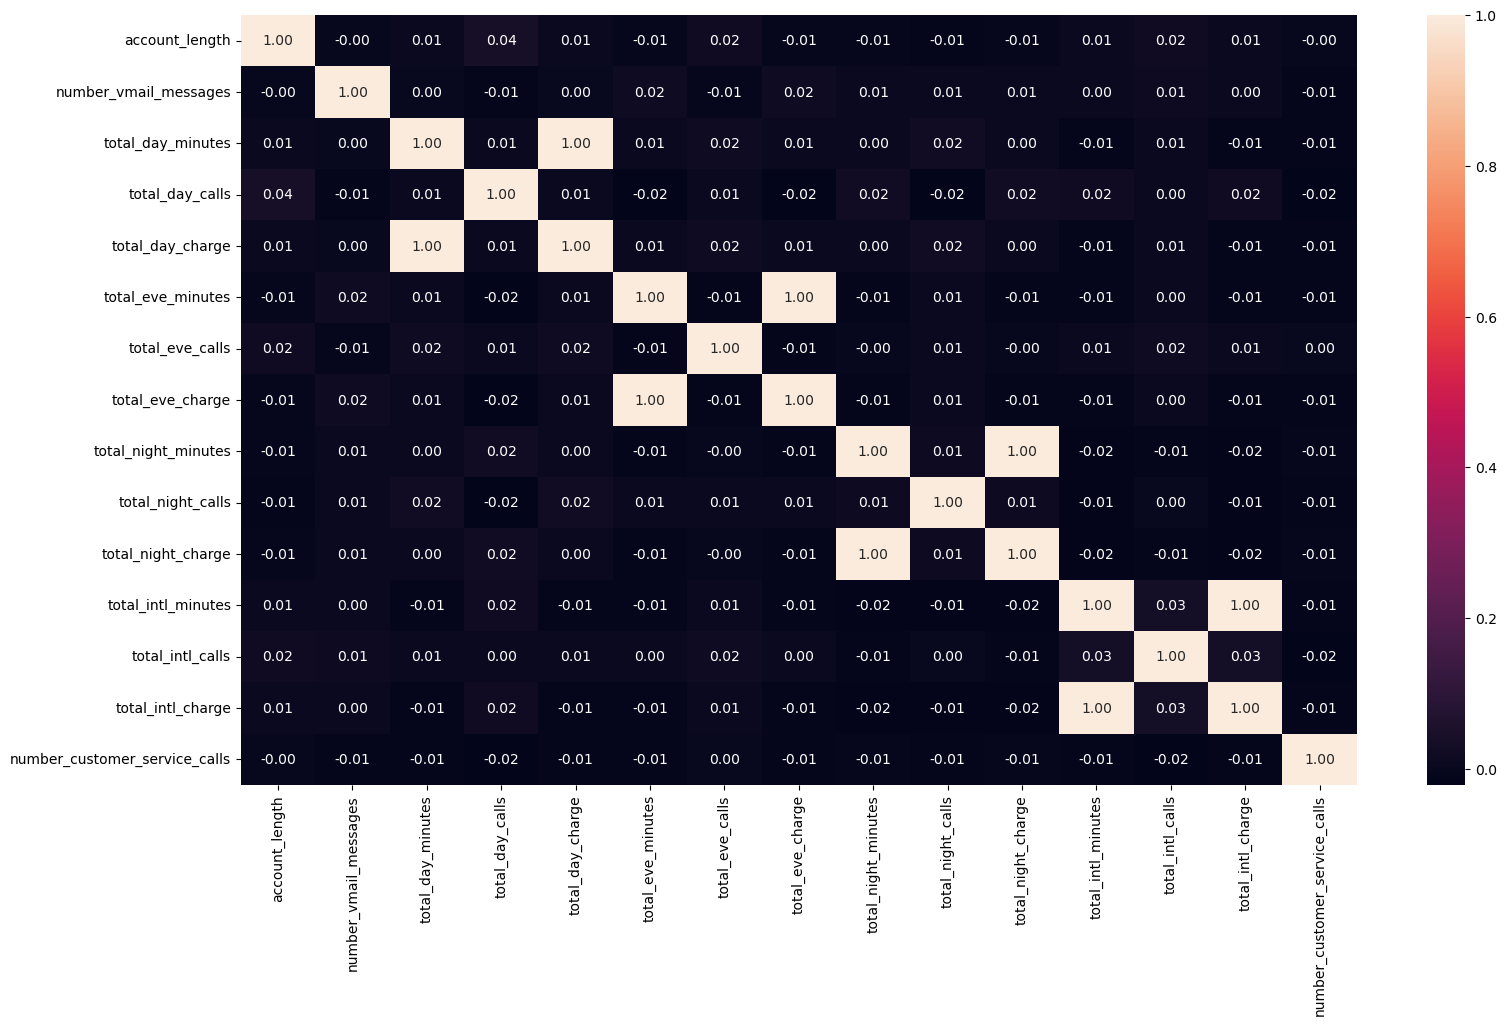

In [64]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Variáveis que apresentam correlação igual a 1:
* total_day_charge e total_day_minutes
* total_eve_charge e total_eve_minutes
* total_night_charge e total_night_minutes
* total_intl_charge e total_intl_minutes

**Conclusão**: temos 4 colunas **redundantes**, visto que a cobrança feita em ligações internacionais é diretamente proporcional ao número de minutos de ligações internacionais ( o mesmo vale para os outros pares). Além disso, verificamos que a maioria dos outros dados não apresenta correlação.

# Pré-processamento dos dados

1. Eliminar colunas redundantes     
2. Transformar colunas categóricas
3. Normalizar os dados

Primeiramente separamos os conjuntos de treino e teste em dados e labels.

In [65]:
X_train, y_train = train_df.drop(columns = ['churn']), train_df.churn.map({'yes':1, 'no':0})
X_test, y_test = test_df.drop(columns = ['churn']), test_df.churn.map({'yes':1, 'no':0})

Em seguida, criamos um objeto para o pré-processamento dos dados.

In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

colunas_redundantes = ["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]
colunas_numericas = [x  for x in train_df.select_dtypes(include=np.number).columns.tolist() if (x not in colunas_redundantes)]
colunas_binarias = ["international_plan", "voice_mail_plan"]

preprocessing = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['area_code', "international_plan", "voice_mail_plan"]),
    (MinMaxScaler(), colunas_numericas),
    remainder = "drop"
)

In [67]:
preprocessing

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['area_code', 'international_plan',
                                  'voice_mail_plan']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['account_length', 'number_vmail_messages',
                                  'total_day_minutes', 'total_day_calls',
                                  'total_eve_minutes', 'total_eve_calls',
                                  'total_night_minutes', 'total_night_calls',
                                  'total_intl_minutes', 'total_intl_calls',
                                  'number_customer_service_calls'])])

Criamos o modelo de Regressão Logística para classificar os dados e inserimos em uma pipeline junto a função de pré-processamento.

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

pipe = make_pipeline(preprocessing, logreg)

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

acc = cross_val_score(pipe, X_train, y_train, cv=10, scoring = "accuracy").mean()
print(f"A acurácia média do modelo no conjunto de treino foi: {acc}")

A acurácia média do modelo no conjunto de treino foi: 0.861384438330546


In [70]:
rec = cross_val_score(pipe, X_train, y_train, cv=10, scoring = "recall").mean()
print(f"O recall médio do modelo no conjunto de treino foi: {rec}")

O recall médio do modelo no conjunto de treino foi: 0.15926870748299318


Apesar do modelo simples ter uma acurácia de quase 86%, não podemos confiar totalmente no resultado. Isso acontece pois o dataset é altamente desbalanceado, de modo que o modelo acerta a maioria das classes negativas, mas erra as classes positivas (que são a minoria). Portanto o ideal é utilizar uma métrica de classificação que foque na classe positiva, o recall.

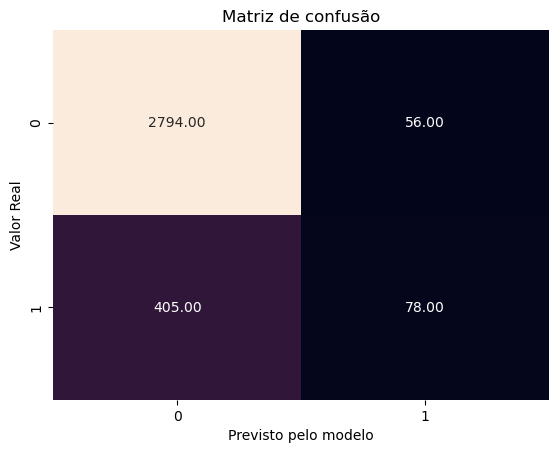

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

sns.heatmap(
    confusion_matrix(y_train, y_train_pred), 
    annot=True, 
    fmt=".2f",
    cbar = False)

plt.title("Matriz de confusão")
plt.xlabel("Previsto pelo modelo")
plt.ylabel("Valor Real")
plt.show()

Podemos observar que o recall score está baixo e a matriz de confusão confirma isso mostrando que o número de falsos negativos (405) está muito alto. Dessa forma, precisamos ajustar o modelo para uma melhor performance na identificação de casos positivos.

# Ajuste do modelo

Primeiramente, tentaremos lidar com o desbalanceamento dos dados, aplicando uma estratégia de over sampling chamda SMOTE que aumenta o número de dados da classe minoritária e uma estratégia de under sampling chamada Random Under Sampling que diminui a classe majoritária aleatoriamente.

In [81]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1918)

logreg = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler(sampling_strategy=0.8)

pipe = imb_make_pipeline(preprocessing, under, over, logreg)

sc = cross_val_score(pipe, X_train, y_train, cv=stratified_kfold, scoring = "recall").mean()
print(f"O recall médio do modelo no conjunto de treino foi: {sc}")

O recall médio do modelo no conjunto de treino foi: 0.7350515463917525


Vemos que o recall subiu consideravelmente, demonstrando a importância de lidar com o desbalanceamento do conjunto.

Em seguida, verificaremos como selecionar as melhores features. Para isso, será utilizado o algoritmo RFE (Recursive Feature Elimination) que utiliza um algoritmo base (no caso usaremos uma Decision Tree) para treinar o modelo e verificar quais features foram mais importantes.

In [83]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1918)

logreg = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler(sampling_strategy=0.8)
rfe = RFECV(estimator=DecisionTreeClassifier())

pipe = imb_make_pipeline(preprocessing, under, over, rfe, logreg)

sc = cross_val_score(pipe, X_train, y_train, cv=stratified_kfold, scoring = "recall").mean()
print(f"O recall média do modelo no conjunto de treino foi: {sc}")

O recall média do modelo no conjunto de treino foi: 0.7413230240549827


Vemos que o recall subiu levemente, no entanto não podemos afirmar se isso foi exclusivamente devido ao RFE ou apenas ao acaso. Desse modo, resta treinar o modelo em diversos cenários ( com diversos hiperparâmetros) para verificar qual a melhor escolha.

In [74]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import FitFailedWarning
import warnings

# Essas linhas servem apenas para ignorar avisos do scikit-learn sobre combinações de hiperparâmetros que não são possíveis.
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1918)

logreg = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler()
rfe = RFECV(estimator=DecisionTreeClassifier())

pipe = imb_make_pipeline(preprocessing, under, over, rfe, logreg)


# define search space
space = dict()
space["randomundersampler__sampling_strategy"] = [0.5, 0.6, 0.7, 0.8, 0.9]
space['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['logisticregression__penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['logisticregression__C'] = loguniform(1e-5, 100)


# define search
search = RandomizedSearchCV(
    pipe, 
    space, 
    n_iter=100, 
    scoring='recall', 
    n_jobs=-1, 
    cv=stratified_kfold, 
    random_state=1)

# execute search
result = search.fit(X_train, y_train)

In [75]:
# summarize result
print('Best Score: %s' % result.best_score_)
for key, value in result.best_params_.items():
    print(key, value)

Best Score: 0.9544029209621993
logisticregression__C 1.2844965107032134e-05
logisticregression__penalty l2
logisticregression__solver liblinear
randomundersampler__sampling_strategy 0.9


In [76]:
over = SMOTE()
under = RandomUnderSampler(sampling_strategy = result.best_params_['randomundersampler__sampling_strategy'])
rfe = RFECV(estimator=DecisionTreeClassifier())
logreg = LogisticRegression(
    C = result.best_params_['logisticregression__C'],
    penalty = result.best_params_['logisticregression__penalty'],
    solver = result.best_params_['logisticregression__solver']
)

pipe = imb_make_pipeline(preprocessing, under, over, rfe, logreg)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['area_code',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['account_length',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'number_customer_service_calls'])])),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy=0.9)),
                ('smote', SMOTE()),
                ('rfecv', RFECV(estimator=DecisionTreeClassifier())),
                ('logisticregression',
                 LogisticRegression(C=1.2844965107032134e-05,
                                    solver='liblinear'))])

In [77]:
from sklearn.metrics import recall_score

y_pred= pipe.predict(X_test)

print(f"O recall para o conjunto de teste foi de {recall_score(y_test, y_pred).round(3)}")

O recall para o conjunto de teste foi de 1.0


Vemos que o recall agora é de quase 95%, de modo que o modelo pode ser considerado satisfatório. No entanto, esse recall alto pode significar um caso de overfitting, mesmo com o modelo tendo sido testando com validação cruzada e o conjunto de testes tendo sido preservado até o modelo final. Assim, talvez seja necessário coletar mais dados a fim de verificar a validade do modelo.

A seguir, vemos mais algumas métricas do modelo final.

In [78]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00      1443
          1       0.13      1.00      0.00      0.24      0.00      0.00       224

avg / total       0.02      0.13      0.87      0.03      0.00      0.00      1667

